<a href="https://colab.research.google.com/github/abhaykukade/Car-Price-Prediction/blob/main/img_classification_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%pip install -q -U keras-tuner
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


# Load Data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(55000, 28, 28)

Scaling the pixel intensities down to the 0-1 range

In [5]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Samples from data

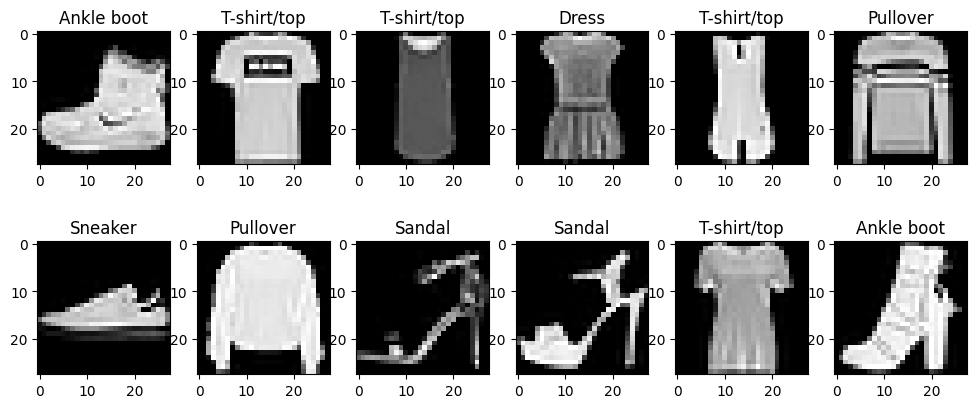

In [7]:
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.flatten()

for i, ax in zip(range(12), axes):
  ax.imshow(X=X_train[i,:], cmap='gray')
  ax.set_title(class_names[y_train[i]])


# MLP Model using sequential API

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
model.get_layer('dense')

<Dense name=dense, built=True>

The parameters of a layer can be accessed as:

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.02816573, -0.00336263,  0.02302352, ...,  0.05322291,
        -0.00245635, -0.02244011],
       [ 0.00533246,  0.01815083, -0.02365864, ..., -0.01799998,
         0.01698419,  0.01840056],
       [-0.0109524 , -0.05557676,  0.05148572, ...,  0.02170528,
         0.04049633, -0.06124347],
       ...,
       [-0.05266465, -0.0445068 ,  0.03870354, ..., -0.05259992,
         0.0115964 , -0.05201546],
       [ 0.04341476, -0.00374595,  0.05034836, ..., -0.05755632,
        -0.0386375 ,  0.00819918],
       [-0.00225838, -0.01999918, -0.03481937, ...,  0.00330579,
        -0.05692934, -0.01856031]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

# Compiling the model

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Training and Evaluating the model

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6620 - loss: 1.0447 - val_accuracy: 0.8228 - val_loss: 0.5105
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8240 - loss: 0.5116 - val_accuracy: 0.8374 - val_loss: 0.4579
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8406 - loss: 0.4580 - val_accuracy: 0.8458 - val_loss: 0.4346
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8510 - loss: 0.4282 - val_accuracy: 0.8510 - val_loss: 0.4195
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8584 - loss: 0.4067 - val_accuracy: 0.8520 - val_loss: 0.4075
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8641 - loss: 0.3895 - val_accuracy: 0.8554 - val_loss: 0.3998
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8684 - loss: 0.3750 - val_accuracy: 0.8594 - val_loss: 0.3923
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8715 - loss: 0.3627

# Plotting Results

<Axes: xlabel='Epoch'>

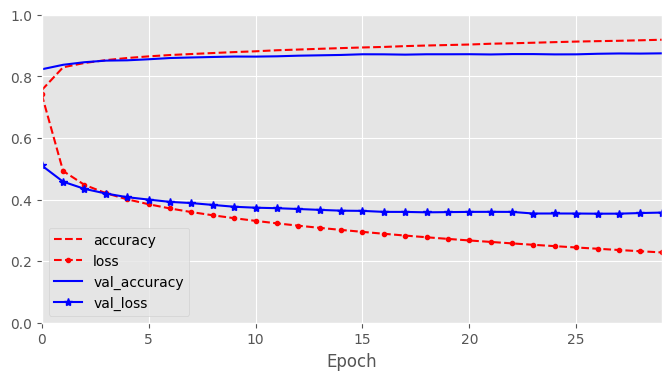

In [19]:
plt.style.use('ggplot')
pd.DataFrame(history.history).plot(
    figsize=(8, 4), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch'
    ,style=['r--', 'r--.', 'b-', 'b-*']
)

# Evaluating on test data

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3784


[0.3755432665348053, 0.871999979019165]

# Tuning Hyperparameters

In [12]:
def build_model(hp):
  n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
  n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
  learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
  optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
  if optimizer == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [13]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='fashion_mnist_tuner', project_name='my_rnd_search', seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.7648000121116638

Best val_accuracy So Far: 0.8661999702453613
Total elapsed time: 00h 05m 44s


In [15]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [16]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [17]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8661999702453613
